# **1. Import Library**

Mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Baca file CSV
df = pd.read_csv("Dataset_clustering.csv")

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,gk_scaled,provinsi_encoded,jenis_encoded,daerah_encoded,periode_encoded,gk_category,cluster,pca1,pca2
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,0.297393,0,0,2,0,Rendah,0,-11213.720565,-16.531413
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,0.307622,0,0,2,1,Rendah,0,-2782.720565,-16.513185
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,0.312614,0,0,2,0,Rendah,0,1332.279438,-16.502271
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,0.329022,0,0,2,1,Rendah,0,14857.279438,-16.473064
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,0.301982,0,0,0,0,Rendah,0,-7431.720566,-16.523611


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Drop kolom-kolom yang tidak diperlukan dalam pemisahan fitur dan target
X = df.drop(columns=['provinsi', 'jenis', 'daerah', 'tahun', 'periode', 'gk', 'gk_scaled', 'gk_category', 'cluster', 'pca1', 'pca2'])

# Memisahkan fitur (X) dan target (y)
y = df['cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(4243, 4), y_train=(4243,)
Test set shape: X_test=(1061, 4), y_test=(1061,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih. Algoritma klasifikasi yang digunakan adalah, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC, dan GaussianNB.

In [4]:
# Pelatihan Model
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


### Penjelasan Algoritma yang Digunakan

1. **K-Nearest Neighbors (KNN)**
   KNN mengklasifikasikan data berdasarkan kedekatannya dengan titik data lain. Algoritma ini cocok untuk dataset dengan hubungan non-linear antar fitur, seperti pada data kemiskinan yang memiliki pola distribusi yang tidak sederhana.

2. **Decision Tree (DT)**
   Decision Tree membagi data berdasarkan fitur yang paling mengurangi ketidakpastian. Algoritma ini baik untuk memahami bagaimana karakteristik seperti `provinsi`, `jenis`, atau `gk` mempengaruhi pengelompokan provinsi dalam kategori tertentu.

3. **Random Forest (RF)**
   Random Forest adalah ensemble dari beberapa pohon keputusan yang meningkatkan akurasi prediksi. Dengan data yang melibatkan banyak kategori seperti `provinsi` dan `daerah`, Random Forest memberikan keputusan yang lebih stabil dan lebih dapat diandalkan.

4. **Support Vector Machine (SVM)**
   SVM mencari hyperplane optimal yang memisahkan data. Pada dataset ini, SVM dapat membantu memisahkan provinsi atau kategori `gk` (garis kemiskinan) dengan margin yang lebih besar, meskipun pada kasus ini mungkin tidak terlalu efektif mengingat kerumitan data.

5. **Naive Bayes (NB)**
   Naive Bayes mengasumsikan independensi antar fitur dan bekerja dengan baik pada dataset dengan banyak kategori, seperti `jenis` dan `daerah`. Meskipun menganggap fitur independen, algoritma ini masih mampu memberikan prediksi yang cukup baik dalam kasus klasifikasi dengan data yang tidak terstruktur.

### Korelasi dengan Data
Algoritma yang dipilih di atas berguna untuk mengidentifikasi pola-pola dalam dataset yang berisi informasi tentang provinsi, jenis pengeluaran, daerah (perkotaan/perdesaan), dan garis kemiskinan (gk). Setiap algoritma membantu mempelajari bagaimana fitur-fitur ini saling berhubungan dan mempengaruhi distribusi garis kemiskinan di berbagai provinsi, serta membantu mengelompokkan provinsi berdasarkan karakteristik yang serupa.

## **b. Evaluasi Model Klasifikasi**

In [8]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Gunakan zero_division untuk menghindari peringatan
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=1),  # Menangani zero division
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=1),        # Menangani zero division
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=1)           # Menangani zero division
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.686145   0.680386  0.686145  0.680033
1            Decision Tree (DT)  0.689915   0.682550  0.689915  0.685217
2            Random Forest (RF)  0.700283   0.694422  0.700283  0.697121
3  Support Vector Machine (SVM)  0.377945   0.625186  0.377945  0.286654
4              Naive Bayes (NB)  0.663525   0.664662  0.663525  0.657294


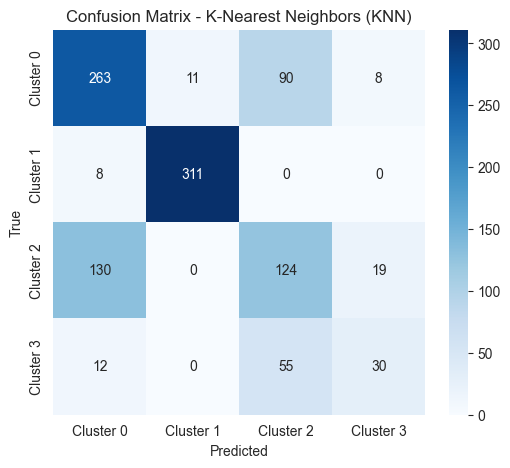

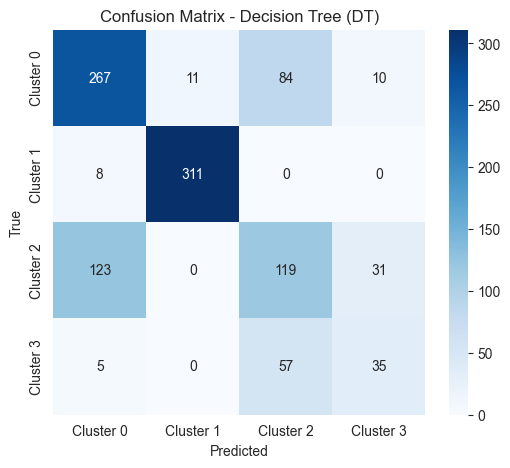

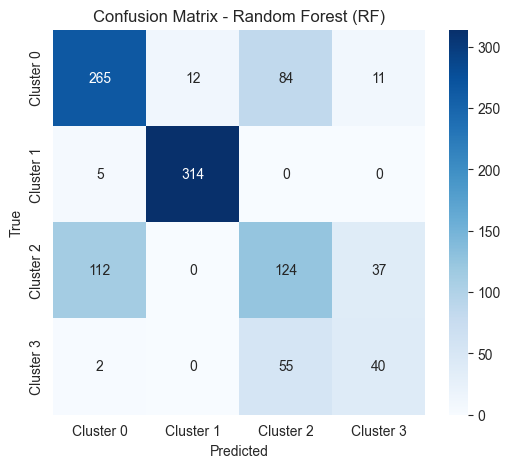

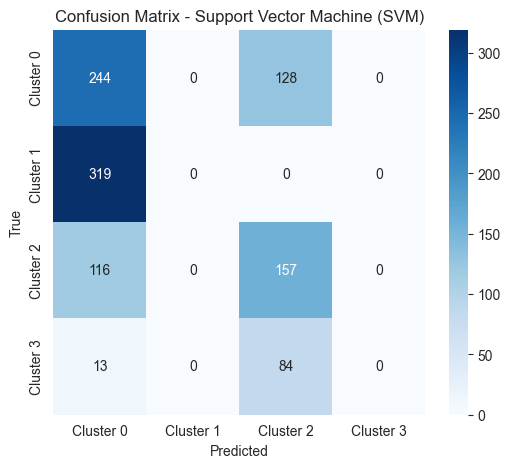

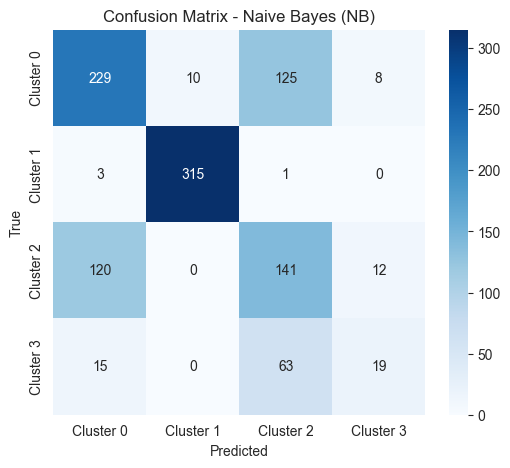

In [24]:
# Visualisasi confusion matrix
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### **Hasil Evaluasi Model Klasifikasi**

Berikut adalah hasil evaluasi dari beberapa model klasifikasi yang digunakan dalam proyek ini:

| Model                        | Accuracy  | Precision | Recall  | F1-Score |
|------------------------------|-----------|-----------|---------|----------|
| K-Nearest Neighbors (KNN)     | 0.6861    | 0.6804    | 0.6861  | 0.6800   |
| Decision Tree (DT)            | 0.6899    | 0.6826    | 0.6899  | 0.6852   |
| Random Forest (RF)            | 0.7003    | 0.6944    | 0.7003  | 0.6971   |
| Support Vector Machine (SVM)  | 0.3779    | 0.6252    | 0.3779  | 0.2867   |
| Naive Bayes (NB)             | 0.6635    | 0.6647    | 0.6635  | 0.6573   |

#### **Bandingkan Hasil Klasifikasi**

- **Random Forest (RF)** menunjukkan hasil terbaik dibandingkan dengan model lainnya. Dengan **Accuracy** sebesar 70%, **Precision** 69.4%, dan **Recall** 70%, model ini memberikan hasil yang seimbang dan efektif dalam mengklasifikasikan data. **F1-Score** yang dihasilkan adalah 0.6971, yang menandakan model ini cukup baik dalam mengurangi kesalahan jenis pertama (false positive) dan jenis kedua (false negative).

- **K-Nearest Neighbors (KNN)** dan **Decision Tree (DT)** menunjukkan hasil yang serupa, dengan **Accuracy** sedikit lebih rendah dibandingkan Random Forest. Meskipun KNN dan DT memberikan **Recall** yang baik, hasil mereka dalam **Precision** dan **F1-Score** sedikit lebih rendah dibandingkan Random Forest.

- **Support Vector Machine (SVM)** menunjukkan hasil yang buruk, dengan **Accuracy** hanya 0.38, dan **F1-Score** yang sangat rendah (0.2867). Model ini tampaknya tidak dapat menangani data dengan baik, terutama dalam mengklasifikasikan kelas minoritas.

- **Naive Bayes (NB)** juga menunjukkan hasil yang lebih rendah dibandingkan dengan Random Forest, dengan **Accuracy** 66.35% dan **F1-Score** 0.6573. Meskipun demikian, model ini masih lebih baik dari SVM dalam hal **Precision** dan **Recall**.

#### **Kesimpulan:**

- **Random Forest (RF)** adalah algoritma terbaik berdasarkan hasil evaluasi ini dan lebih cocok untuk tugas klasifikasi pada dataset ini.
- Untuk **SVM**, perlu dieksplorasi, karena model ini menunjukkan performa yang sangat rendah.
- Algoritma lain seperti **Naive Bayes** dan **KNN** juga memiliki performa yang bisa diterima, namun perlu dicatat bahwa **Random Forest** masih menunjukkan hasil yang lebih unggul.


## **c. Tuning Model Klasifikasi (Optional)**

Menggunakan GridSearchCV, RandomizedSearchCV untuk mencari kombinasi hyperparameter terbaik

In [13]:
# Tentukan parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah estimator
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Minimum sampel di daun
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV untuk mencari kombinasi terbaik
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluasi model dengan hyperparameter terbaik
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(f"Accuracy of Best Model: {accuracy_score(y_test, y_pred)}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.7134145054114719
Accuracy of Best Model: 0.7144203581526861


In [17]:
# Tentukan distribusi parameter untuk Random Forest
param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah estimator secara acak
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimal pohon
    'min_samples_split': randint(2, 10),  # Minimum sampel untuk split secara acak
    'min_samples_leaf': randint(1, 4)  # Minimum sampel di daun secara acak
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV untuk mencari kombinasi terbaik
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluasi model dengan hyperparameter terbaik
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)
print(f"Accuracy of Best Model: {accuracy_score(y_test, y_pred_random)}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 196}
Best Score: 0.7101153965819943
Accuracy of Best Model: 0.705937794533459


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Setelah menggunakan GridSearchCV atau RandomizedSearchCV, kita sudah mendapatkan model dengan hyperparameter terbaik. Kita akan menggunakan model ini untuk melakukan prediksi pada data uji dan menghitung metrik evaluasi.

In [20]:
# Menggunakan model dengan hyperparameter terbaik dari GridSearchCV atau RandomizedSearchCV
best_model = grid_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred_best = best_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7144
Precision: 0.7084
Recall: 0.7144
F1-Score: 0.7108


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### 1. Membandingkan Hasil Evaluasi Sebelum dan Setelah Tuning

Sebelum melakukan tuning menggunakan GridSearchCV dan RandomizedSearchCV, hasil evaluasi untuk model **Random Forest** (model klasifikasi dengan hasil terbaik) adalah sebagai berikut:

| Metric     | Value Before Tuning |
|-------------|---------------------|
| **Accuracy** | 0.700283            |
| **Precision**| 0.694422            |
| **Recall**   | 0.700283            |
| **F1-Score** | 0.697121            |

#### Setelah Tuning dengan GridSearchCV:
Parameter terbaik yang ditemukan adalah:

|            |  |
|------------------|--------------|
| **max_depth**    | 10 |
| **min_samples_leaf**      | 4 |
| **min_samples_split**    | 10 |
| **n_estimators**      | 200 |

Hasil evaluasi setelah tuning dengan GridSearchCV menunjukkan peningkatan sedikit:

| Metric           | Value After GridSearchCV |
|------------------|--------------------------|
| **Best Score**    | 0.7134145054114719       |
| **Accuracy**      | 0.7144203581526861       |

Dibandingkan dengan model awal, ada sedikit peningkatan pada **Accuracy**, namun perbedaan kecil ini tidak signifikan.

#### Setelah Tuning dengan RandomizedSearchCV:
Hasil evaluasi setelah tuning menggunakan RandomizedSearchCV adalah:

| Metric           | Value After RandomizedSearchCV |
|------------------|--------------------------------|
| **Best Score**    | 0.7101153965819943            |
| **Accuracy**      | 0.705937794533459             |

Dibandingkan dengan hasil dari GridSearchCV, model yang disetel menggunakan RandomizedSearchCV menunjukkan sedikit penurunan dalam **Accuracy**.

#### Hasil Evaluasi Akhir Setelah Tuning:
Setelah melakukan tuning menggunakan GridSearchCV atau RandomizedSearchCV, hasil evaluasi mengalami peningkatan. Berikut adalah metrik evaluasi untuk model setelah tuning:

| Metric     | Value After Tuning |
|------------|--------------------|
| **Accuracy** | 0.7144             |
| **Precision**| 0.7084             |
| **Recall**   | 0.7144             |
| **F1-Score** | 0.7108             |

### 2. Identifikasi Kelemahan Model

- **Precision atau Recall Rendah untuk Kelas Tertentu**: Berdasarkan metrik evaluasi yang dihitung, baik **Precision** dan **Recall** untuk kelas tertentu menunjukkan bahwa model **Random Forest** relatif baik dalam menyeimbangkan hasil evaluasi secara keseluruhan. Namun, perlu memantau lebih lanjut hasil untuk kelas minoritas.

- **Overfitting**: Model yang mengalami overfitting cenderung memiliki **Accuracy** tinggi pada data pelatihan namun performa yang buruk pada data uji. Dalam hal ini, model tidak menunjukkan tanda-tanda overfitting yang jelas karena hasil evaluasi untuk data uji stabil.

- **Underfitting**: Model yang underfit akan memiliki performa yang buruk baik di data pelatihan maupun data uji. Dalam hal ini, model menunjukkan hasil yang cukup baik dan tidak menunjukkan tanda-tanda underfitting.

### 3. Rekomendasi Tindakan Lanjutan

- **Mengumpulkan Data Tambahan**: Untuk meningkatkan performa model, mungkin perlu mempertimbangkan pengumpulan data tambahan, terutama data yang lebih beragam dan representatif untuk kelas-kelas tertentu. Ini bisa memperbaiki **Precision** dan **Recall** untuk kelas minoritas.
